In [1]:
%pylab inline
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


In [2]:
import h5py
import group_data as gd
import numpy as np
import pylab as plb
plb.rcParams['pdf.fonttype'] = 42

In [3]:
baseline_subtract = True

In [4]:
sig_mtrx_filename = 'extracted_step_trans_yaw.hdf5'

In [5]:
data = h5py.File(sig_mtrx_filename)

In [6]:
data_arrays = dict()

In [7]:
for key,value in data.items():
    data_arrays[key] = np.array(value)
#baseline subtract the data
#mask = (data_arrays['signal_names'] != 'Ph0') & \
#       data_arrays['signal_names'] != 'wb_frequency')
if baseline_subtract:
    times = np.linspace(0,23,shape(data_arrays['signal_data'])[1])
    baseline_epoch = (times < 10) & (times>3)
    baseline = np.nanmean(data_arrays['signal_data'][:,baseline_epoch],axis = 1)
    data_arrays['signal_data'] = data_arrays['signal_data'] - baseline[:,np.newaxis]

/home/psilentp/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: RuntimeWarning: invalid value encountered in subtract


In [8]:
def calc_cell_stats(trial_name = 'flow_right',signal_name = 'Ph1',group = 'GMR22H05'):
    stats = list()
    for fly in gd.swarms[group].flies:
        selection = (data_arrays['signal_names'] == signal_name) & \
                    (data_arrays['fly_numbers'] == fly.fly_num) & \
                    (data_arrays['trial_names'] == trial_name)
        stats.append(np.nanpercentile(data_arrays['signal_data'][selection,:],50,axis = 0))
        
    return stats

In [9]:
# get a list of the signal types used in the analysis
signal_names = set(data_arrays['signal_names'])
trial_names = set(data_arrays['trial_names'])

In [10]:
# compute median muscle response for each fly and 
# organize into a signal type by trial type dictionary
cell_dict = dict()
for signal_name in signal_names:
    cell_dict[signal_name] = dict()
    for trial_name in trial_names:
        cell_dict[signal_name][trial_name] = calc_cell_stats(trial_name = trial_name,
                                                             signal_name = signal_name,
                                                             group = 'GMR22H05')

/home/psilentp/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:598: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [11]:
def plot_cell(**kwargs):
    fig = kwargs['fig']
    transform = kwargs['transform']
    sig_scale = kwargs['sig_scale']
    sig_start = kwargs['sig_start']
    row_span =  kwargs['row_span']
    
    fig.add_subplot(gs[row:row+row_span-1,col])
    gca().set_axis_bgcolor('none')
    ybound = (sig_start,sig_start+sig_scale*(row_span/5.0))
    #print kwargs['signal_name'] + str(ybound[1] - ybound[0])
    clip_on = kwargs['clip_on']
    stats = cell_dict[kwargs['signal_name']][kwargs['trial_name']]
    
    ub = transform(np.nanpercentile(stats,75,axis = 0))
    lb = transform(np.nanpercentile(stats,25,axis = 0))
    me = transform(np.nanpercentile(stats,50,axis = 0))
    times = np.linspace(0,23,len(ub))
    fill_between(times,ub,lb,lw =0,alpha = 1.0,clip_on = clip_on,color = 'b')
    plot(times,me,lw =0.2,alpha = 1.0,clip_on = clip_on,color = 'c')
    gca().set_ybound(ybound)
    gca().spines['bottom'].set_visible(kwargs['bspine'])
    #gca().spines['left'].set_visible(kwargs['lspine'])
    gca().spines['left'].set_visible(False)
    gca().spines['top'].set_visible(False)
    gca().spines['right'].set_visible(False)
    [x.set_visible(False) for x in plb.gca().get_xticklabels()]
    [y.set_visible(False) for y in plb.gca().get_yticklabels()]#.set_visible(False)
    [x.set_visible(False) for x in plb.gca().get_xticklines()]
    [y.set_visible(False) for y in plb.gca().get_yticklines()]
    if kwargs['lspine']:gca().set_ylabel(kwargs['axname'])
    if kwargs['tspine']:gca().set_title(kwargs['trial_label'])
    #if kwargs['bspine']:axvspan(10,13,facecolor = 'g',alpha = 0.3,ymax = 20)

In [12]:
sig_plot_args_no_baseline_subtract = [ 
                 {'signal_name':'wb_frequency',
                   'sig_scale':50,
                   'sig_start':175,   
                   'row':0,'row_span':5,  
                   'transform':lambda x:x},
                  {'signal_name':'Ph1',
                   'sig_scale': 20,
                   'sig_start':35,      
                   'row':5,
                   'row_span':5,  
                   'transform':lambda x:np.rad2deg(x/5)},
                  {'signal_name':'b1',            
                   'sig_scale':0.75,
                   'sig_start':1.3,   
                   'row':10,'row_span':5,  
                   'transform':lambda x:x,
                   'sb':True},
                  {'signal_name':'b2',            
                   'sig_scale':0.75,
                   'sig_start':0.0, 
                   'row':15,
                   'row_span':2,  
                   'transform':lambda x:x,
                   'sb':True},
                  {'signal_name':'b3',            
                   'sig_scale':0.75,
                   'sig_start':0.5,    
                   'row':17,'row_span':3,  
                   'transform':lambda x:x,
                   'sb':True},
                  {'signal_name':'i1',            
                   'sig_scale':0.75,
                   'sig_start':0,    
                   'row':20,'row_span':2,  
                   'transform':lambda x:x,
                   'sb':True},
                  {'signal_name':'i2',            
                   'sig_scale':0.75,
                   'sig_start':0,      
                   'row':22,'row_span':3,  
                   'transform':lambda x:x,
                   'sb':True},
                  {'signal_name':'iii1',          
                   'sig_scale':0.75,
                   'sig_start':0,     
                   'row':26,'row_span':1,  
                   'transform':lambda x:x,
                   'sb':True},
                  {'signal_name':'iii24',         
                   'sig_scale':0.75,
                   'sig_start':0,   
                   'row':28,'row_span':3,  
                   'transform':lambda x:x,
                   'sb':True},
                  {'signal_name':'iii3',          
                   'sig_scale':0.75,
                   'sig_start':0.3,  
                   'row':31,'row_span':4,  
                   'transform':lambda x:x,
                  'sb':True},
                  {'signal_name':'hg1',           
                   'sig_scale':0.75,
                   'sig_start':0,     
                   'row':35,'row_span':4, 
                   'transform':lambda x:x,
                  'sb':True},
                  {'signal_name':'hg2',           
                   'sig_scale':0.75,
                   'sig_start':0,   
                   'row':39,'row_span':2, 
                   'transform':lambda x:x,
                  'sb':True},
                  {'signal_name':'hg3',           
                   'sig_scale':0.75,
                   'sig_start':0.1,   
                   'row':44,'row_span':5, 
                   'transform':lambda x:x,
                  'sb':True},
                  {'signal_name':'hg4',           
                   'sig_scale':0.75,
                   'sig_start':0.5,    
                   'row':49,'row_span':3, 
                   'transform':lambda x:x,
                  'sb':True}]

trial_list = ['flow_left','flow_right','ascending','descending','progressive','regressive']
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(52, len(trial_list))

In [148]:
sig_plot_args_baseline_subtract = [ 
                  {'signal_name':'wb_frequency',
                   'axname':'freq',
                   'sig_scale':25,
                   'sig_start':-12,   
                   'row':0,'row_span':5,
                   'transform':lambda x:x},
                  {'signal_name':'Ph1',
                   'axname':'rwing \n amp',
                   'sig_scale': 15,
                   'sig_start':-6,      
                   'row':5,
                   'row_span':5,  
                   'transform':lambda x:np.rad2deg(x/5)},
                  {'signal_name':'b1',
                   'axname':'b1',
                   'sig_scale':0.5,
                   'sig_start':-0.25,   
                   'row':10,'row_span':5,  
                   'transform':lambda x:x,
                   'sb':True},
                  {'signal_name':'b2',
                   'axname':'b2',
                   'sig_scale':0.5,
                   'sig_start':-0.1, 
                   'row':15,
                   'row_span':2,  
                   'transform':lambda x:x,
                   'sb':True},
                  {'signal_name':'b3',
                   'axname':'b3',
                   'sig_scale':0.5,
                   'sig_start':-0.1,    
                   'row':17,'row_span':2,  
                   'transform':lambda x:x,
                   'sb':True},
                  {'signal_name':'i1',
                   'axname':'i1',
                   'sig_scale':0.5,
                   'sig_start':-0.1,    
                   'row':20,'row_span':2,  
                   'transform':lambda x:x,
                   'sb':True},
                  {'signal_name':'i2',
                   'axname':'i2',
                   'sig_scale':0.5,
                   'sig_start':-0.1,      
                   'row':22,'row_span':3,  
                   'transform':lambda x:x,
                   'sb':True},
                  {'signal_name':'iii1',
                   'axname':'iii1',
                   'sig_scale':0.5,
                   'sig_start':-0.1,     
                   'row':25,'row_span':2,  
                   'transform':lambda x:x,
                   'sb':True},
                  {'signal_name':'iii24',
                   'axname':'iii24',
                   'sig_scale':0.5,
                   'sig_start':-0.2,   
                   'row':27,'row_span':3,  
                   'transform':lambda x:x,
                   'sb':True},
                  {'signal_name':'iii3', 
                   'axname':'iii3',
                   'sig_scale':0.5,
                   'sig_start':-0.25,  
                   'row':29,'row_span':4,  
                   'transform':lambda x:x,
                  'sb':True},
                  {'signal_name':'hg1',
                   'axname':'hg1',
                   'sig_scale':0.5,
                   'sig_start':-0.1,     
                   'row':34,'row_span':4, 
                   'transform':lambda x:x,
                  'sb':True},
                  {'signal_name':'hg2',
                   'axname':'hg2',
                   'sig_scale':0.5,
                   'sig_start':-0.1,   
                   'row':38,'row_span':2, 
                   'transform':lambda x:x,
                  'sb':True},
                  {'signal_name':'hg3',
                   'axname':'hg3',
                   'sig_scale':0.5,
                   'sig_start':-0.1,   
                   'row':45,'row_span':5, 
                   'transform':lambda x:x,
                  'sb':True},
                  {'signal_name':'hg4',
                   'axname':'hg4',
                   'sig_scale':0.5,
                   'sig_start':-0.25,    
                   'row':50,'row_span':3, 
                   'transform':lambda x:x,
                  'sb':True}]

trial_list = ['flow_right','flow_left','ascending','descending','progressive','regressive']
label_list = ['leftward \n yaw','rightward \n yaw',
             'ascending \n translation','descending \n translation',
             'progressive \n translation','regressive \n translation']
import matplotlib.gridspec as gridspec
#gs = gridspec.GridSpec(53, len(trial_list))
gs = gridspec.GridSpec(len(sig_plot_args_baseline_subtract)*5, len(trial_list))

In [158]:
for signal_dict in sig_plot_args_baseline_subtract:
    times = np.linspace(0,23,shape(data_arrays['signal_data'])[1])
    tselect = (times>10) & (times<13)
    signal_name = signal_dict['signal_name']
    selection = (data_arrays['signal_names'] == signal_name) & \
                (data_arrays['swarm_names'] == 'GMR22H05')
    trnsfm = signal_dict['transform']
    upper = np.percentile(trnsfm(data_arrays['signal_data'][selection,:][:,tselect]),90)
    lower = np.percentile(trnsfm(data_arrays['signal_data'][selection,:][:,tselect]),10)
    rng = upper-lower
    signal_dict['sig_scale'] = rng
    signal_dict['sig_start'] = lower

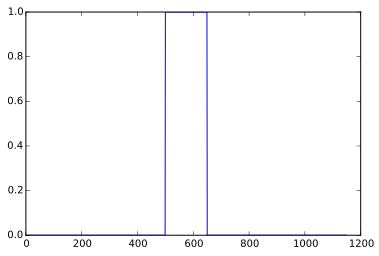

In [159]:
plot(tselect)

In [160]:
if baseline_subtract:
    sig_plot_args = sig_plot_args_baseline_subtract
else:
    sig_plot_args = sig_plot_args_no_baseline_subtract

fig = figure(figsize = (8,10))
ax_list = list()

for cnum in range(6):
    ax_list.append(fig.add_subplot(gs[:,cnum]))
    gca().spines['bottom'].set_visible(False)
    gca().spines['left'].set_visible(False)
    gca().spines['top'].set_visible(False)
    gca().spines['right'].set_visible(False)
    [x.set_visible(False) for x in plb.gca().get_xticklabels()]
    [y.set_visible(False) for y in plb.gca().get_yticklabels()]#.set_visible(False)
    [x.set_visible(False) for x in plb.gca().get_xticklines()]
    [y.set_visible(False) for y in plb.gca().get_yticklines()]
    axvspan(10,13,facecolor = 'g',alpha = 0.2,lw =0)

for rownum,kwargs in enumerate(sig_plot_args):
    kwargs['row'] = rownum*5
    kwargs['row_span'] = 5
    row = kwargs.pop('row')
    for col,trial_tup in enumerate(zip(trial_list,label_list)):
        trial_name,trial_label = trial_tup
        kwargs['trial_name'] = trial_name
        kwargs['trial_label'] = trial_label
        kwargs['clip_on'] = False
        kwargs['lspine'] = col == 0
        kwargs['tspine'] = rownum == 0
        kwargs['bspine'] = rownum == len(sig_plot_args)-1
        kwargs['fig'] = fig
        plot_cell(**kwargs)

for ax in fig.get_axes():
    ax.set_xbound(0,23.0)
"""
fig.add_subplot(gs[0:4,:])
gca().set_axis_bgcolor('none')
gca().spines['right'].set_position(('outward',10.0))
gca().yaxis.set_label_position("right")
gca().set_ylabel('20 Hz',labelpad=20)
[x.set_visible(False) for x in plb.gca().get_xticklabels()]
[y.set_visible(False) for y in plb.gca().get_yticklabels()]
[x.set_visible(False) for x in plb.gca().get_xticklines()]
[y.set_visible(False) for y in plb.gca().get_yticklines()]
gca().spines['left'].set_visible(False)
gca().spines['bottom'].set_visible(False)
gca().spines['top'].set_visible(False)

fig.add_subplot(gs[5:8,:])
gca().set_axis_bgcolor('none')
gca().spines['right'].set_position(('outward',10.0))
gca().yaxis.set_label_position("right")
gca().set_ylabel(u'9\u00B0',labelpad=20)
[x.set_visible(False) for x in plb.gca().get_xticklabels()]
[y.set_visible(False) for y in plb.gca().get_yticklabels()]
[x.set_visible(False) for x in plb.gca().get_xticklines()]
[y.set_visible(False) for y in plb.gca().get_yticklines()]
gca().spines['left'].set_visible(False)
gca().spines['bottom'].set_visible(False)
gca().spines['top'].set_visible(False)

fig.add_subplot(gs[10:14,:])
gca().set_axis_bgcolor('none')
gca().spines['right'].set_position(('outward',10.0))
gca().yaxis.set_label_position("right")
gca().set_ylabel(u'0.4\u0394 F/F',labelpad=20,fontname = 'STIXGeneral')
[x.set_visible(False) for x in plb.gca().get_xticklabels()]
[y.set_visible(False) for y in plb.gca().get_yticklabels()]
[x.set_visible(False) for x in plb.gca().get_xticklines()]
[y.set_visible(False) for y in plb.gca().get_yticklines()]
gca().spines['left'].set_visible(False)
gca().spines['bottom'].set_visible(False)
gca().spines['top'].set_visible(False)
"""
savefig('yaw_translate_GMR22H05.pdf')

/home/psilentp/anaconda/lib/python2.7/site-packages/matplotlib/backends/backend_pdf.py:2264: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  different = bool(ours != theirs)


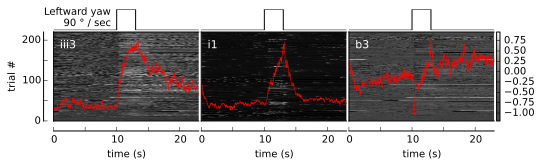

In [15]:
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
clrs = vstack([np.linspace(0,1,100)**2.3]*3)
#clrs = vstack([np.linspace(0,1,100)**1.6]*3)
clrlist = [(v,c) for v,c in zip(np.linspace(0,1,100),clrs.T)]
loggrey = LinearSegmentedColormap.from_list('loggrey',clrlist)
#loggrey = cm.nipy_spectral

stim_times =  [0,10,10,13,13,23]
stim_values = [0,0, 1, 1, 0, 0]

gs = gridspec.GridSpec(10, 76)
fig = figure(figsize = (8,2))

subplot(gs[0:2,0:25])
plot(stim_times,stim_values,c = 'k')
#gca().set_title('Flow right')
[x.set_visible(False) for x in plb.gca().get_xticklabels()]
[y.set_visible(False) for y in plb.gca().get_yticklabels()]#.set_visible(False)
[x.set_visible(False) for x in plb.gca().get_xticklines()]
[y.set_visible(False) for y in plb.gca().get_yticklines()]
gca().spines['top'].set_visible(False)
gca().spines['right'].set_visible(False)
gca().spines['left'].set_visible(False)
gca().spines['bottom'].set_visible(False)
gca().set_xbound(0,23)
text(9,0.2,u'Leftward yaw \n 90 \u00B0 / sec',color = 'k',fontsize = 10,ha='right')
gca().set_xbound(0,23.0)

subplot(gs[2:,0:25])
selection = (data_arrays['signal_names'] == 'iii3') & \
            (data_arrays['trial_names'] == 'flow_right') &\
            (data_arrays['swarm_names'] == 'GMR22H05')
dtamtrx = data_arrays['signal_data'][selection,:]
imshow(dtamtrx[::-1,:],aspect = 'auto',cmap = loggrey,extent = [0,23,0,sum(selection)])#,vmin = -0.75,vmax = 1.5)
gca().spines['top'].set_visible(False)
gca().spines['right'].set_visible(False)
gca().spines['bottom'].set_position(('outward',10.0))
gca().spines['left'].set_position(('outward',10.0))
[x.set_visible(False) for x in plb.gca().get_xticklabels()[1::2]]
[y.set_visible(False) for y in plb.gca().get_yticklabels()[1::2]]#.set_visible(False)
[x.set_visible(False) for x in plb.gca().get_xticklines()[1::2]]
[y.set_visible(False) for y in plb.gca().get_yticklines()[1::2]]
gca().set_xlabel('time (s)')
gca().set_ylabel('trial #')
text(1,180,'iii3',color = 'w',fontsize = 11)
gca().set_xbound(0,23.0)
gca().twinx()
gca().set_axis_bgcolor('none')
plot(np.linspace(0,23,shape(dtamtrx)[1]),np.median(dtamtrx,axis = 0),lw = 0.5,c = 'r')
[x.set_visible(False) for x in plb.gca().get_yticklabels()]
[y.set_visible(False) for y in plb.gca().get_yticklines()]
gca().spines['right'].set_visible(False)
gca().set_xbound(0,23.0)


subplot(gs[0:2,25:50])
plot(stim_times,stim_values,c = 'k')
[x.set_visible(False) for x in plb.gca().get_xticklabels()]
[y.set_visible(False) for y in plb.gca().get_yticklabels()]#.set_visible(False)
[x.set_visible(False) for x in plb.gca().get_xticklines()]
[y.set_visible(False) for y in plb.gca().get_yticklines()]
gca().spines['top'].set_visible(False)
gca().spines['right'].set_visible(False)
gca().spines['left'].set_visible(False)
gca().spines['bottom'].set_visible(False)
gca().set_xbound(0,23)
#text(9,0.2,u'Leftward yaw \n 90 \u00B0 / sec',color = 'k',fontsize = 10,ha='right')

subplot(gs[2:,25:50])
selection = (data_arrays['signal_names'] == 'i1') & \
            (data_arrays['trial_names'] == 'flow_right') &\
            (data_arrays['swarm_names'] == 'GMR22H05')
dtamtrx = data_arrays['signal_data'][selection,:]
axim = imshow(dtamtrx[::-1,:],aspect = 'auto',cmap = loggrey,extent = [0,23,0,sum(selection)])#,vmin = -0.75,vmax = 1.5)
gca().spines['top'].set_visible(False)
gca().spines['right'].set_visible(False)
gca().spines['left'].set_visible(False)
gca().spines['bottom'].set_position(('outward',10.0))
[x.set_visible(False) for x in plb.gca().get_xticklabels()[1::2]]
[y.set_visible(False) for y in plb.gca().get_yticklabels()[::]]#.set_visible(False)
[x.set_visible(False) for x in plb.gca().get_xticklines()[1::2]]
[y.set_visible(False) for y in plb.gca().get_yticklines()[::]]
gca().set_xlabel('time (s)')
## motion of reference frame
text(1,180,'i1',color = 'w',fontsize = 11)
ax.set_xbound(0,23.0)
gca().twinx()
gca().set_axis_bgcolor('none')
plot(np.linspace(0,23,shape(dtamtrx)[1]),np.median(dtamtrx,axis = 0),lw = 0.5,c = 'r')
[x.set_visible(False) for x in plb.gca().get_yticklabels()]
[y.set_visible(False) for y in plb.gca().get_yticklines()]
gca().spines['right'].set_visible(False)

gca().set_xbound(0,23.0)


subplot(gs[0:2,50:75])
plot(stim_times,stim_values,c = 'k')
[x.set_visible(False) for x in plb.gca().get_xticklabels()]
[y.set_visible(False) for y in plb.gca().get_yticklabels()]#.set_visible(False)
[x.set_visible(False) for x in plb.gca().get_xticklines()]
[y.set_visible(False) for y in plb.gca().get_yticklines()]
gca().spines['top'].set_visible(False)
gca().spines['right'].set_visible(False)
gca().spines['left'].set_visible(False)
gca().spines['bottom'].set_visible(False)
gca().set_xbound(0,23)

subplot(gs[2:,50:75])
selection = (data_arrays['signal_names'] == 'b3') & \
            (data_arrays['trial_names'] == 'flow_right') &\
            (data_arrays['swarm_names'] == 'GMR22H05')
dtamtrx = data_arrays['signal_data'][selection,:]
axim = imshow(dtamtrx[::-1,:],aspect = 'auto',cmap = loggrey,extent = [0,23,0,sum(selection)])#,vmin = -0.75,vmax = 1.5)
gca().spines['top'].set_visible(False)
gca().spines['right'].set_visible(False)
gca().spines['left'].set_visible(False)
gca().spines['bottom'].set_position(('outward',10.0))
[x.set_visible(False) for x in plb.gca().get_xticklabels()[1::2]]
[y.set_visible(False) for y in plb.gca().get_yticklabels()[::]]#.set_visible(False)
[x.set_visible(False) for x in plb.gca().get_xticklines()[1::2]]
[y.set_visible(False) for y in plb.gca().get_yticklines()[::]]
gca().set_xlabel('time (s)')
## motion of reference frame
text(1,180,'b3',color = 'w',fontsize = 11)
gca().set_xbound(0,23.0)
gca().twinx()
gca().set_axis_bgcolor('none')
plot(np.linspace(0,23,shape(dtamtrx)[1]),np.median(dtamtrx,axis = 0),lw = 0.5,c = 'r')
[x.set_visible(False) for x in plb.gca().get_yticklabels()]
[y.set_visible(False) for y in plb.gca().get_yticklines()]
gca().spines['right'].set_visible(False)
gca().set_xbound(0,23.0)

ax = subplot(gs[2:,75:])
colorbar(axim,ax)
gcf().subplots_adjust(wspace=0.75)
savefig('yaw_example_raster_GMR22H05.pdf')

In [60]:
np.arange(0,23,shape(dtamtrx)[0])

array([0])

In [295]:
X,Y = meshgrid(np.arange(0,1150),np.arange(0,1,0.1))

In [310]:
pnts = np.vstack((Y.ravel(),X.ravel()))

In [311]:
ext = kernel(pnts)

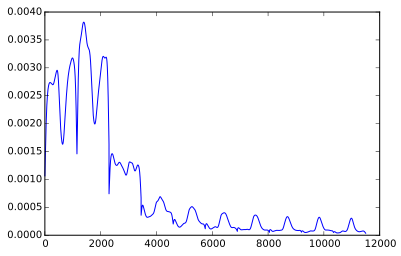

In [312]:
plot(ext[:])

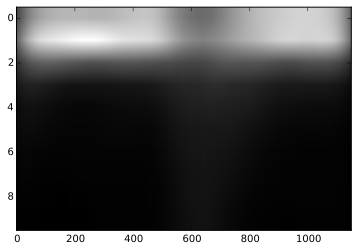

In [314]:
imshow(ext.reshape(X.shape),aspect = 'auto',cmap = cm.gray)

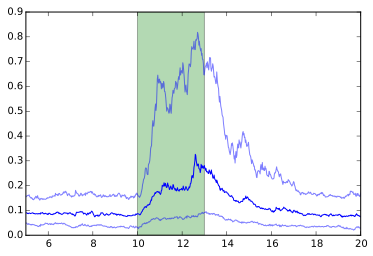

In [129]:
axvspan(10,13,facecolor = 'g',alpha = 0.3)
tms = np.linspace(0,23,shape(bsl_sub)[1])

plot(tms,np.percentile(bsl_sub,50,axis = 0))
plot(tms,np.percentile(bsl_sub,25,axis = 0),'b',alpha = 0.5)
plot(tms,np.percentile(bsl_sub,75,axis = 0),'b',alpha = 0.5)
gca().set_xbound(5,20)

0.75

In [79]:
bsln = sts -np.nanmean(sts[:,0:100],axis = 1)[:,np.newaxis]

In [76]:
shape(sts[:,0:100])

(23, 100)

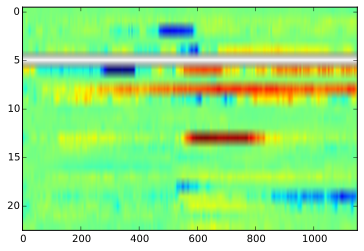

In [82]:
imshow(bsln,aspect = 'auto')

In [ ]:
sig_plot_args = [ {'signal_name':'wb_frequency',
                   'sig_scale':50,
                   'sig_start':175,   
                   'row':0,'row_span':5,'offset' = 0,  
                   'transform':lambda x:x},
                  {'signal_name':'Ph1',
                   'sig_scale': 20,
                   'sig_start':45,      
                   'row':5,
                   'row_span':5,
                   'transform':lambda x:np.rad2deg(x/5)},
                  {'signal_name':'b1',            
                   'sig_scale':2.0,
                   'sig_start':1.0,   
                   'row':10,'row_span':90,  
                   'transform':lambda x:x},
                  {'signal_name':'b2',            
                   'sig_scale':0.5,
                   'sig_start':0, 
                   'row':10,'row_span':90,  
                   'transform':lambda x:x},
                  {'signal_name':'b3',            
                   'sig_scale':1.0,
                   'sig_start':0,    
                   'row':10,'row_span':90,  
                   'transform':lambda x:x},
                  {'signal_name':'i1',            
                   'sig_scale':0.5,
                   'sig_start':0,    
                   'row':10,'row_span':90,  
                   'transform':lambda x:x},
                  {'signal_name':'i2',            
                   'sig_scale':1.0,
                   'sig_start':0,      
                   'row':10,'row_span':90,  
                   'transform':lambda x:x},
                  {'signal_name':'iii1',          
                   'sig_scale':1.0,
                   'sig_start':0,     
                   'row':10,'row_span':90,  
                   'transform':lambda x:x},
                  {'signal_name':'iii24',         
                   'sig_scale':1.0,
                   'sig_start':0,   
                   'row':10,'row_span':90,  
                   'transform':lambda x:x},
                  {'signal_name':'iii3',          
                   'sig_scale':1.0,
                   'sig_start':0,  
                   'row':10,'row_span':90,  
                   'transform':lambda x:x},
                  {'signal_name':'hg1',           
                   'sig_scale':1.0,
                   'sig_start':0,     
                   'row':10,'row_span':90, 
                   'transform':lambda x:x},
                  {'signal_name':'hg2',           
                   'sig_scale':1.0,
                   'sig_start':0,   
                   'row':10,'row_span':90, 
                   'transform':lambda x:x},
                  {'signal_name':'hg3',           
                   'sig_scale':1.0,
                   'sig_start':0,   
                   'row':10,'row_span':90, 
                   'transform':lambda x:x},
                  {'signal_name':'hg4',           
                   'sig_scale':1.0,
                   'sig_start':0,    
                   'row':10,'row_span':90, 
                   'transform':lambda x:x}]

trial_list = ['flow_left','flow_right','ascending','descending','progressive','regressive']